<a href="https://colab.research.google.com/github/brunoribas68/POS_IA_UFPR/blob/main/Arquitetura_Dados/Atividade_2_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregar os dados e Bibliotecas

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = pd.read_csv("sample_data/Immunotherapy.csv",sep=";")


# Separar características e rótulos

In [98]:
X = data.drop(columns=['Result_of_Treatment'])
y = data['Result_of_Treatment']

# Dividir os dados em treinamento e teste

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Treinar SVM com dados originais

In [100]:
svm_original = SVC()
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)

# Normalizar as características


In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Treinar SVM com dados normalizados


In [102]:
svm_resampled = SVC()
svm_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_scaled = svm_scaled.predict(X_test_scaled)


# Avaliar desempenho com matriz de confusão

In [103]:
cm_original = confusion_matrix(y_test, y_pred_original)
cm_scaled = confusion_matrix(y_test, y_pred_scaled)

# Exibir as matrizes de confusão

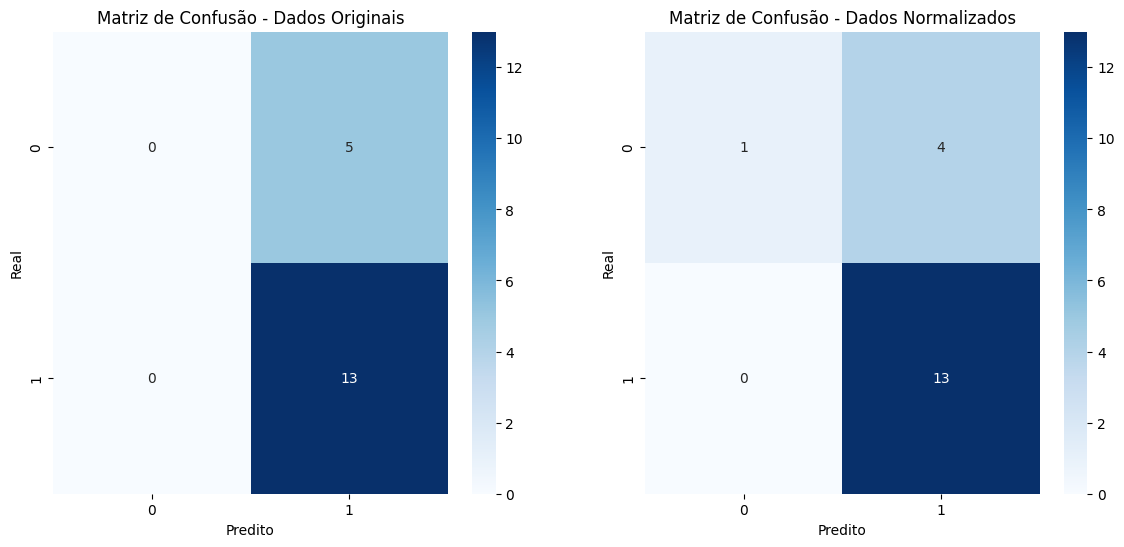

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusão - Dados Originais')
ax[0].set_xlabel('Predito')
ax[0].set_ylabel('Real')

sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusão - Dados Normalizados')
ax[1].set_xlabel('Predito')
ax[1].set_ylabel('Real')

plt.show()


# Exibir relatório de classificação

In [105]:
print("Desempenho com dados originais:\n", classification_report(y_test, y_pred_original))
print("Desempenho com dados normalizados:\n", classification_report(y_test, y_pred_scaled))

Desempenho com dados originais:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18

Desempenho com dados normalizados:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Acuracia

In [124]:
accuracy_original = accuracy_score(y_test, y_pred_original) * 100
print(f"Acurácia com dados Originais: {accuracy_original:.2f}")

accuracy_processado = accuracy_score(y_test, y_pred_scaled) * 100
print(f"Acurácia com dados processados:{accuracy_processado:.2f}")

Acurácia com dados Originais: 72.22
Acurácia com dados processados:77.78
